In [52]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)


pd.options.mode.chained_assignment = None



In [2]:
df = pd.read_csv('netflix_titles.csv')

In [5]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [6]:
# Chek missing data
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

show_id - 0.0%
type - 0.0%
title - 0.0%
director - 31.0%
cast - 9.0%
country - 7.0%
date_added - 0.0%
release_year - 0.0%
rating - 0.0%
duration - 0.0%
listed_in - 0.0%
description - 0.0%


In [8]:
# Kita dapat gunakan fungsi dropna() untuk menghapus data yang tidak memiliki nilai dan 
# fungsi fillna() untuk mengisi nilai yang kosong.
# memberbaiki missing data dengan menginput bebas (input menggunakan fillna)
# menggunakan inplace untuk menimpa data frame asli dengan modifikasi dengan nilai true
df['country'] = df['country'].fillna(df['country'].mode()[0])
df['cast'].replace(np.nan, 'No Data', inplace = True)
df['director'].replace(np.nan, 'No Data', inplace = True)
df.dropna(inplace = True)
df.drop_duplicates(inplace = True)

In [9]:
# chek kembali apakah data sudah terreplace sehingga tidak ada missing value

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

show_id - 0.0%
type - 0.0%
title - 0.0%
director - 0.0%
cast - 0.0%
country - 0.0%
date_added - 0.0%
release_year - 0.0%
rating - 0.0%
duration - 0.0%
listed_in - 0.0%
description - 0.0%


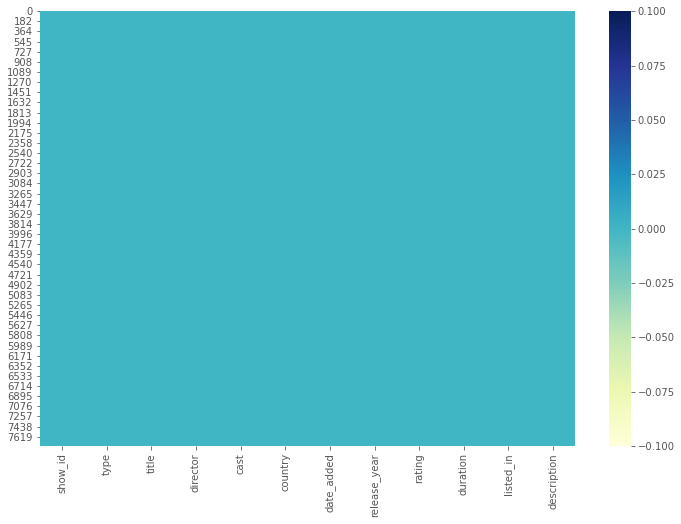

In [25]:
# cheking missing data dengan seaborn visual
sns.heatmap(df.isnull(),cmap = 'YlGnBu')

In [13]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,No Data,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [14]:
# menghapus duplikat data yang sama

df.drop_duplicates()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,No Data,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...
...,...,...,...,...,...,...,...,...,...,...,...,...
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,No Data,Nasty C,United States,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,No Data,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...


In [15]:
df.sort_values(by=['rating'], inplace=False, ascending=False)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
2953,s2954,Movie,Immoral Tales,Walerian Borowczyk,"Lise Danvers, Fabrice Luchini, Charlotte Alexa...",France,"June 6, 2019",1974,UR,103 min,"Dramas, International Movies, Romantic Movies",This anthology illustrates the timeless nature...
2484,s2485,Movie,Good Luck Chuck,Mark Helfrich,"Dane Cook, Jessica Alba, Dan Fogler, Ellia Eng...","United States, Canada","October 1, 2019",2007,UR,99 min,"Comedies, Romantic Movies","Every time Chuck breaks up with a girlfriend, ..."
7728,s7729,Movie,You Don't Mess with the Zohan,Dennis Dugan,"Adam Sandler, John Turturro, Emmanuelle Chriqu...",United States,"September 1, 2019",2008,UR,113 min,"Action & Adventure, Comedies",An Israeli counterterrorism soldier with a sec...
5573,s5574,Movie,Shootout at Lokhandwala,Apoorva Lakhia,"Sanjay Dutt, Sunil Shetty, Amitabh Bachchan, A...",India,"May 15, 2019",2007,UR,116 min,"Action & Adventure, Dramas, International Movies","Based on a true story, this action film follow..."
5522,s5523,Movie,Sex Doll,Sylvie Verheyde,"Hafsia Herzi, Ash Stymest, Karole Rocher, Paul...","United Kingdom, France","July 10, 2017",2016,UR,103 min,"Dramas, International Movies, Romantic Movies",A high-end call girl falls for a handsome man ...
...,...,...,...,...,...,...,...,...,...,...,...,...
6769,s6770,Movie,The Polar Express,Robert Zemeckis,"Tom Hanks, Leslie Zemeckis, Eddie Deezen, Nona...",United States,"January 1, 2021",2004,G,100 min,Children & Family Movies,"In this warm-hearted tale, a young boy's faith..."
5007,s5008,Movie,Pup Star: World Tour,Robert Vince,"Jed Ress, Makenzie Moss, Denisse Ojeda, Reggie...","Canada, Japan, United States","May 5, 2018",2018,G,87 min,"Children & Family Movies, Comedies, Music & Mu...",Talented pooches from around the world compete...
7242,s7243,Movie,True Grit,Henry Hathaway,"John Wayne, Glen Campbell, Kim Darby, Jeremy S...",United States,"January 1, 2020",1969,G,128 min,"Classic Movies, Dramas",Teenage tomboy Mattie Ross enlists the help of...
6758,s6759,Movie,The Pirate Fairy,Peggy Holmes,"Mae Whitman, Christina Hendricks, Tom Hiddlest...",United States,"June 15, 2014",2014,G,78 min,Children & Family Movies,"In this spritely tale, Tinker Bell and her fri..."


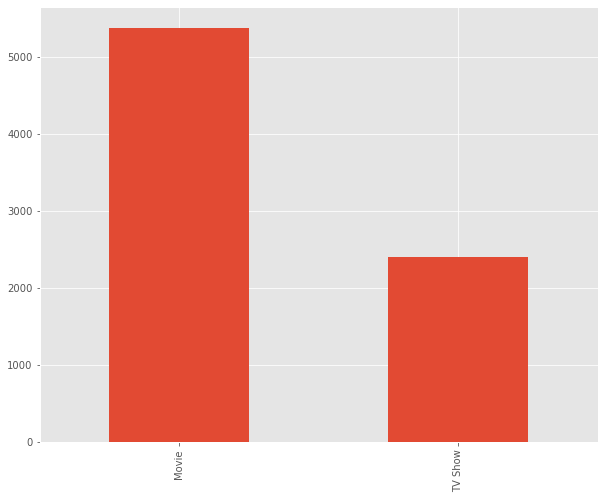

In [20]:
# jumlah type produksi film
df["type"].value_counts().plot(kind='bar',figsize=(10,8))

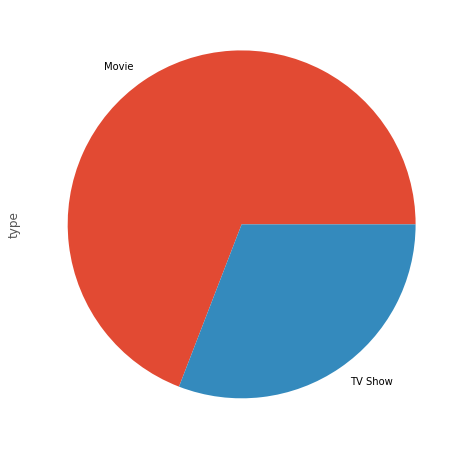

In [59]:
df["type"].value_counts().plot(kind='pie',figsize=(10,8))

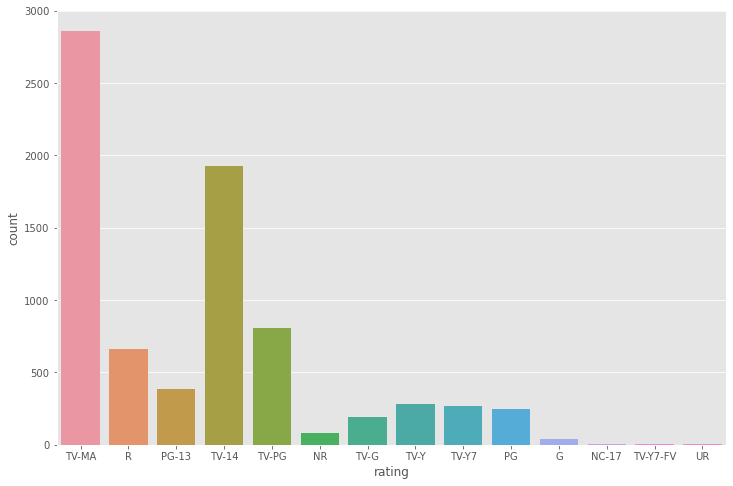

In [61]:
plt.figure(figsize=(12,8))
sns.countplot(x='rating',data=df)

In [84]:
df_countries = pd.DataFrame(df.country.value_counts().reset_index().values, columns=["country", "count"])
df_countries.head(10)

,country,count
0,United States,3051
1,India,923
2,United Kingdom,396
3,Japan,224
4,South Korea,183
5,Canada,177
6,Spain,134
7,France,115
8,Egypt,101
9,Mexico,100


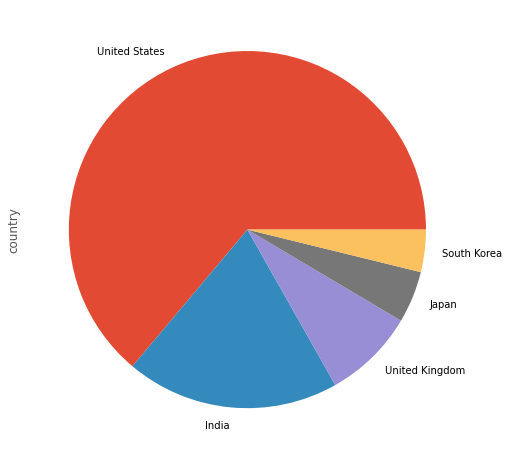

In [30]:
df["country"].value_counts()[:5].plot(kind='pie',figsize=(8,10))

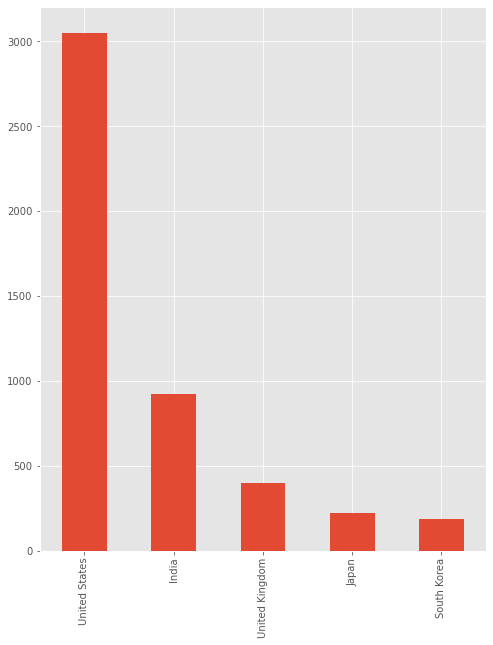

In [68]:
df["country"].value_counts()[:5].plot(kind='bar',figsize=(8,10))

In [ ]:
# berdasarkan dua grafik bar dan pie menunjukan US adalah penyumbang terbanyak di netflix

In [38]:
print(df.dtypes)

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object


In [56]:
df["country"].value_counts()

United States                               3051
India                                        923
United Kingdom                               396
Japan                                        224
South Korea                                  183
                                            ... 
Saudi Arabia, United Arab Emirates             1
United States, Chile, Israel                   1
Netherlands, Belgium, Germany, Jordan          1
United Kingdom, Denmark, Canada, Croatia       1
United States, France, Serbia                  1
Name: country, Length: 681, dtype: int64

In [57]:
df["type"].value_counts()

Movie      5372
TV Show    2398
Name: type, dtype: int64

In [ ]:
# Menggunakan seaborn karena plot memakai tipe data objek sehingga lebih nyaman dan lebih bagus

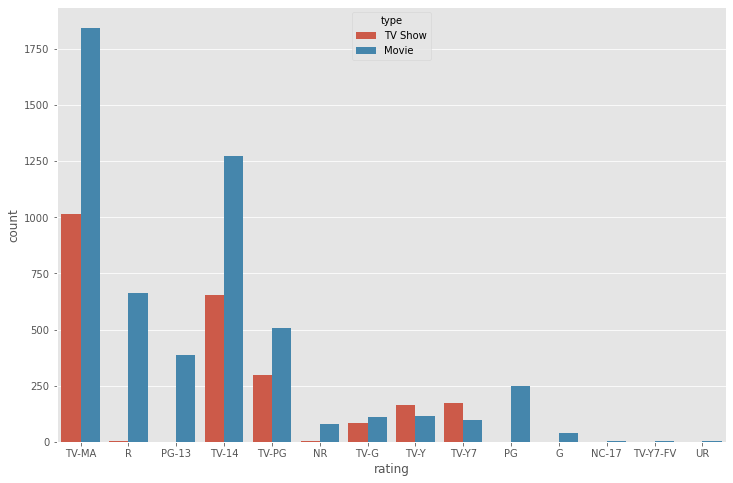

In [72]:
plt.figure(figsize=(12,8))
sns.countplot(x='rating',data=df,hue='type')

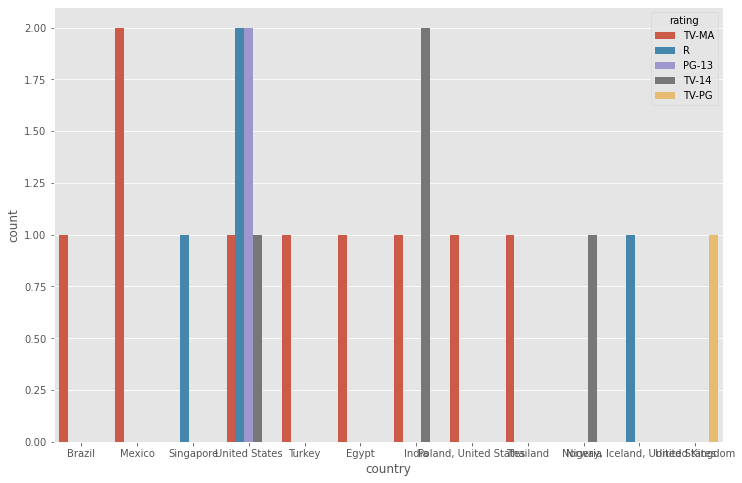

In [79]:
plt.figure(figsize=(12,8))
sns.countplot(x='country',data=df.head(20),hue='rating')

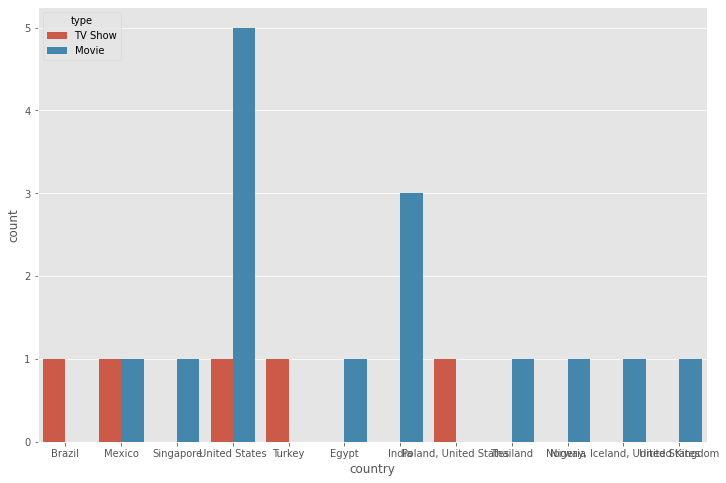

In [82]:
plt.figure(figsize=(12,8))
sns.countplot(x='country',data=df.head(20),hue='type')

In [90]:
# Tambahan mencari data film berdasarkan tag
tag = "Adventure" #Adventure on Netflix
df["relevant"] = df['listed_in'].fillna("").apply(lambda x : 1 if tag.lower() in x.lower() else 0)
com = df[df["relevant"] == 1]
com[com["country"] == "United States"][["title", "country","release_year"]].head(10)

,title,country,release_year
3,9,United States,2009
44,Æon Flux,United States,2005
88,2307: Winter's Dream,United States,2016
104,30 Minutes or Less,United States,2011
108,3Below: Tales of Arcadia,United States,2019
117,5 Cowok Jagoan,United States,2017
127,6 Underground,United States,2019
225,A Series of Unfortunate Events,United States,2019
262,A.X.L.,United States,2018
298,Act of Valor,United States,2012
